# COVID19 & the Stock Market

## Gareth Hughes - Beto Sibileau

### Project Goals:
- Gather two different data-sources
- Show the evolution of the pandemic
- Compare pandemic evolution against stock market
- Quantify the COVID impact on different countries economies
- Provide a quick workflow review of the technical data analysis



### What is Coronavirus?

- Coronavirus, also called COVID-19, is a previously unreported pneumonia detected in Wuhan, China and reported to the WHO Country Office in China on 31 December 2019. 
- 210 Countries and Territories have been affected globally. 
- The outbreak was declared a Public Health Emergency of International Concern on 30 January 2020.


## Our databases: WHO COVID19 Data & Yahoo Finance Data.

### Importing all libraries. COVID-19 data source: World Health Organization (WHO).

In [1]:
import datetime
import numpy as np
import pandas as pd
from matplotlib.dates import DateFormatter, MonthLocator, DayLocator
import matplotlib.pyplot as plt
import requests
from pandas_datareader import data


C:\Users\beto\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
csv = '../Gareth Hughes/owid-covid-data.csv'

In [3]:
df = pd.read_csv(csv)

### Here's our COVID-19 Data inside of a Panda's DataFrame. 

We imported the data into a panda's dataframe from a CSV file to allow for easy
analysis of a dataset of this size.

In [4]:
df.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,tests_units
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,0.0,NaN,NaN,NaN,NaN,NaN


### We used .describe() to get an overview of the data. 

We also used describe to determine if there were any strange or outlier results. Existing NaN's or NULL values do not modify our analysis.

In [5]:
df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand
count,11401.000000,11401.000000,11401.000000,11401.000000,11236.000000,11236.000000,11236.000000,11236.000000,2.083000e+03,1822.000000,2083.000000,1823.000000
mean,3064.109552,185.384879,167.676520,12.730199,194.333601,11.608349,7.105144,0.505230,8.091202e+04,5798.558727,4.303788,0.265041
std,21704.677850,1382.745007,1330.798624,105.329207,785.818422,70.616721,50.888747,3.859358,2.434716e+05,17458.515803,9.845400,0.544606
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.407000e+03,276.500000,0.111000,0.015000
50%,14.000000,1.000000,0.000000,0.000000,2.097000,0.030000,0.000000,0.000000,1.558400e+04,1198.500000,0.796000,0.080000
75%,233.000000,20.000000,3.000000,0.000000,55.169000,2.684250,0.392000,0.000000,5.520350e+04,4115.000000,4.278000,0.321000
max,671331.000000,35527.000000,33284.000000,4928.000000,12552.301000,4944.376000,1119.689000,176.793000,3.242755e+06,229268.000000,111.308000,7.243000


### For example we utilised the dataframe to 'count' the number of countries within our database, which was 206.


In [6]:
df['iso_code'].unique().size

206

### Stock Market data source is Yahoo Finance.

It is accessed from Pandas remotely using `pandas_datareader` library, which in turn requires the `requests` package. For example, we show below a data request about Spanish stock index *IBEX 35* from `start_date` to `end_date`.

In [7]:
start_date = '2020-02-01'
end_date = '2020-04-17'
panel_data = data.DataReader('^IBEX', 'yahoo', start_date, end_date)

This is how the requested *IBEX 35* information looks inside a Panda's DataFrame:

In [8]:
panel_data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-02-03,9431.599609,9361.500000,9404.400391,9404.700195,168665700,9404.700195
2020-02-04,9577.299805,9462.400391,9465.900391,9562.900391,174133900,9562.900391
2020-02-05,9721.900391,9540.200195,9553.400391,9717.799805,221922900,9717.799805
2020-02-06,9816.200195,9757.000000,9767.099609,9811.299805,248416700,9811.299805
2020-02-07,9816.200195,9761.799805,9789.299805,9811.000000,179586900,9811.000000


We observe that stock market information is not provided for weekends (e.g. see above that `start_date = '2020-02-01'`, while the actual data reported begins **2020-02-03**).

# Data Cleaning

Thankfully the WHO dataset NaN or NULL values do not affect our analysis. The only 'cleaning' required was altering the datatype of the date column from an object type to a datetime type. For example we do that below for a subsetting of Spain from the COVID-19 Panda's DataFrame:

In [9]:
spain = df[df['location'] == 'Spain'].copy()
spain['date'] = pd.to_datetime(spain['date'])
spain.dtypes

iso_code                            object
location                            object
date                        datetime64[ns]
total_cases                          int64
new_cases                            int64
total_deaths                         int64
new_deaths                           int64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
tests_units                         object
dtype: object

We will export our data from Pandas into Excel format, to use it in the Flourish webpage (data storytelling). For example, below we transpose Panda's DataFrame (swap the rows and columns) and then export this to an Excel.

In [10]:
transposed_df = spain.T
transposed_df.to_excel('spain_dataset.xlsx')

## Matching COVID-19 and Stock Market Data

In the following, we show how we match our two different data sources by dates. We do it below, beginning by extracting from Spanish COVID-19 DataFrame, `date` and `total_cases` from the moment the infected were detected for the first time:

In [11]:
# subset Spain total cases against market!
spaTotCases = df[['date','total_cases']][df['location'] == 'Spain']
spaTotCases = spaTotCases[spaTotCases.total_cases > 0].reset_index()

We observe in the following that the first official detected cases in Spain has been reported since **2020-02-01** and our COVID-19 data source is updated until **2020-04-17**:



In [12]:
print(f"First reported date in Spain and number of infected people:\n \
{spaTotCases[['date','total_cases']].head(1)}\n \
Last date in our data source and number of cases:\n \
{spaTotCases[['date','total_cases']].tail(1)}")

First reported date in Spain and number of infected people:
          date  total_cases
0  2020-02-01            1
 Last date in our data source and number of cases:
           date  total_cases
76  2020-04-17       182816


The match between dates from COVID-19 and Yahoo Finance data sources is not straightforward considering stocks market info is not reported for weekends or holidays. Thus we build a boolean variable `boolDate` to match them properly:

In [13]:
# stock prices doesn't have w-ends!
boolDate  = spaTotCases.date == panel_data.index[0]
for date in panel_data.index:
    boolDate = boolDate | (pd.to_datetime(spaTotCases.date) == date)

Now we use `boolDate` to fill `spaTotCases` DataFrame with a new column `'stock'`, where we place the closing values per day obtained from Yahoo Finance for Spain (*IBEX 35* stock market index):

In [14]:
# Close values of IBEX 35 per day
stockClose = panel_data.Close
# initialize stock column first
spaTotCases['stock'] = stockClose
# then properly place stockClose val|ues
spaTotCases['stock'].loc[boolDate] = stockClose.values

C:\Users\beto\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


This is `spaTotCases` DataFrame with the new column `'stock'` added. Note that stock market information has not been provided during Easter time (from **2020-04-10** to **2020-04-13**).

In [15]:
# write pandas DataFrame spaTotCases to csv file
spaTotCases.to_csv('spainTotCaseStock.csv')
spaTotCases.tail(10)

,index,date,total_cases,stock
67,3419,2020-04-08,140510,6951.799805
68,3420,2020-04-09,146690,7070.600098
69,3421,2020-04-10,152446,NaN
70,3422,2020-04-11,157022,NaN
71,3423,2020-04-12,161852,NaN
72,3424,2020-04-13,166019,NaN
73,3425,2020-04-14,169496,7108.600098
74,3426,2020-04-15,172541,6839.500000
75,3427,2020-04-16,177633,6763.399902
76,3428,2020-04-17,182816,6875.799805


# Questions and Answers 

### What are the countries that are most affected by Coronavirus in terms of New Deaths, Total Deaths and Total Cases?

In [16]:
idx = df['new_deaths'] == df['new_deaths'].max()
df[['location','new_deaths']][idx]

,location,new_deaths
11001,United States,4928


In [17]:
idx = df['total_deaths'] == df['total_deaths'].max()
df[['location','total_deaths']][idx]

,location,total_deaths
11002,United States,33284


In [18]:
idx = df['total_cases'] == df['total_cases'].max()
df[['location','total_cases']][idx]

,location,total_cases
11002,United States,671331


### How has Coronavirus affected countries globally? How have the number of cases increased with time in our chosen 15 countries?

In order to analyse our dataset more specifically, we chose 15 countries in order to determine how Coronavirus has affected them overtime. The 15 countries were selected based on their number of cases.
As the dataset is large and the data is sometimes inconsistent with respect to their start date, we chose 6 specific time points in order to observe the evolution of the virus.

In [19]:
select15 = df[(df['location'] == 'United States') |
               (df['location'] == 'Spain') |
               (df['location'] == 'Italy') |
               (df['location'] == 'Germany') |
                (df['location'] == 'France') |
                (df['location'] == 'United Kingdom') |
                (df['location'] == 'China') |
                (df['location'] == 'Iran') |
                (df['location'] == 'Turkey') |
                (df['location'] == 'Belgium') |
                (df['location'] == 'Brazil') |
                (df['location'] == 'Canada') |
                (df['location'] == 'Netherlands') |
                (df['location'] == 'Russia') |
                (df['location'] == 'Switzerland')]

In [20]:
select15_time = select15[((select15['date'] == '2020-01-31')
                   | (select15['date'] == '2020-02-29')
                   | (select15['date'] == '2020-03-16')
                    | (select15['date'] == '2020-03-31')
                   | (select15['date'] == '2020-04-08')
                   | (select15['date'] == '2020-04-17'))]

### Answer

As you can see from the plot below, the greatest number of total coronavirus cases is in the USA, with China, Italy also affected. By utilising the above datasets, we have plotted the evolution of the virus in each of these countries with time. For brevity and to keep the audience interest, instead of showing each image seperately, we exported a PNG file of the graph at each time point, then using a basic movie making software, we constructed a video. 

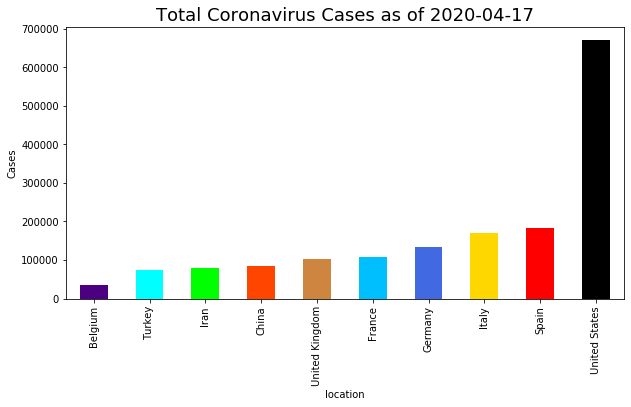

In [21]:
sort = df.sort_values(by = 'total_cases', ascending = False)
aprilend_top10 = sort[sort['date'] == '2020-04-17'].head(10)
aprilend_top10.plot(x = 'location', y = 'total_cases', kind = 'bar', legend = None, color=['black','red','gold','royalblue','deepskyblue','peru','orangered','lime','cyan','indigo','orchid','maroon','oldlace','g','forestgreen'])
plt.gca().invert_xaxis()
plt.rc('font', size= 15) 
plt.title("Total Coronavirus Cases as of 2020-04-17")
plt.ylabel("Cases")
plt.gcf().set_size_inches(10,5)
plt.savefig('Top 15 2020-04-17.png', bbox_inches='tight')
plt.show()

The resulting video is attached in the following [link](https://drive.google.com/open?id=1uYf_BTOa8BModt2vM9xS9CMGENrgRzYI)

###  How has Coronavirus in Spain evolved over time? Is our data source reliable?

We are particularly interested in how the number of deaths in Spain has progressed with time and wherever they are inline with the expectation of services such as MOMO. MOMO is the Mortality Monitoring System of Spain who makes predictions with regards to the number of daily deaths on average in Spain. During COVID-19 the deaths have increased dramatically from the baseline, and the values reported to WHO are different from those reported by MOMO.
This suggests that there is discrepancy or a delay possibly in reporting of the COVID-19 to WHO.

In order to plot the data, we utilised Matplotplib. The resulting line graph demonstrates a significant uptick in the number of deaths as a result of COVID-19 beginning in March and finally plateauing in mid-April.

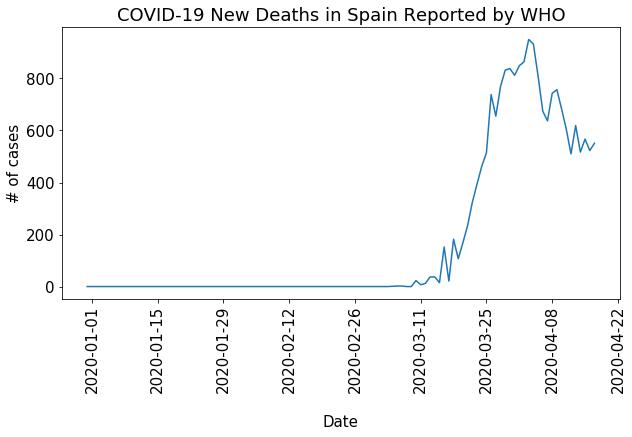

In [22]:
plt.plot(spain['date'], spain['new_deaths'])
plt.title("COVID-19 New Deaths in Spain Reported by WHO")
plt.xlabel('\nDate')
plt.gca().xaxis.set_major_locator(DayLocator(interval = 14))
plt.xticks(rotation = 90)
plt.ylabel('# of cases')
plt.gcf().set_size_inches(10,5)
plt.savefig('Spain NewCasesNewDeaths', bbox_inches='tight')

The MOMO database, which estimates the amount of deaths per day in Spain since 2008, has displayed an increase in deaths above the typical average mortality rate.

![](images/momo.png)

As previously mentioned, we also used Flourish in order to visualize our data. This allowed us to see a rolling bar chart of the data subset from Spain withtime. The visualization is viewable below.

#### https://public.flourish.studio/visualisation/2021252/

### How has Coronavirus in Spain evolved over time compared to its stock market?

In this part we compare the evolution of the total cases in Spain against its stock market index named *IBEX 35*. The resulting plot is performed in the following figure, which contains two scales in the y-axis (left for total cases, right for *IBEX 35*):

![spainIbex](images/spainIbexG.png)

From the plot above we get the following data insights. Tipping point (date) for COVID: <span style="color:blue"> March 09 </span>, tipping point (date starting decay) for *IBEX 35*: <span style="color:blue"> February 19 </span>, date where *IBEX 35* recovery trend begins: <span style="color:blue"> March 16 </span>, *IBEX 35* relative decay: <span style="color:red"> 39.5 % </span> and *IBEX 35* relative recovery: <span style="color:red"> 13.7 % </span>.

The main ingredients to get the plot above are shown in the Matlab&reg; code below. We will soon update this post to reproduce the same Figure using Python matplotlib library instead!

```Matlab
% read pandas DataFrame spaTotCases from csv
B = readtable('spainTotCaseStock.csv');
% equivalent to numpy array from one to len(spaTotCases.total_cases)
x = 1:size(B{:,4},1);
% equivalent to pandas spaTotCases.stock
y = B{:,5};
% interpolate linearly the NaN values from stock market array 'y'
xs = x(~isnan(y));
ys = y(~isnan(y));
yi = interp1(xs, ys, x, 'Linear');
% define x array with dates from pandas spaTotCases.date
startdate = datetime(B{1,3});
enddate = datetime(B{end,3});
x = startdate:enddate;
% equivalent to pandas spaTotCases.total_cases
y1 = B{:,4};
% plot using two scales in y-axis (left: spaTotCases.total_cases) - (right: spaTotCases.stock with NaN interpolated)
[hAx,hLine1,hLine2] = plotyy(x,y1,x,yi);
```

The main ingredient is to replace NaN values from the stock market (that is weekends or holidays) with linearly interpolated values from the reported data available. Using the same workflow we could extract information about how COVID-19 in other countries such as Germany (see figure below).


![germanyGDAXI](images/germanyGDAXI_g.png)


## Conclusions 

### What did we learn from our findings and data analysis?

- Finding a comprehensive and good API is hard to find! We're often limited by the number of calls the API allows us to do everyday. However, it appears that Yahoo allows for large number of calls.
- It's important to compare different sources of data. For example; the discrepancy between WHO and MOMO highlights different reporting methods. 
- Being realistic with our data sources and our expectation. We determined that analysing the whole dataset for every single day would not help our narrative.
- Based on our data anlysis, we reported the following results in the stock markets (refer to our presentation [here](https://docs.google.com/presentation/d/1BTXM-IvcF2lO5uZjeCRaDrxv3b4xxCChFT3GSv59iKY/edit#slide=id.g731ddd128b_1_18) to see all our data visualizations):
    - The highest stock market drop during COVID-19 among our analyzed countries has been registered in Italy (<span style="color:red"> 42 % </span>).
    - The highest stock market recovery during COVID-19 among our analyzed countries has been registered in USA (<span style="color:red"> 29 % </span>).
    - Western stock markets decays started on <span style="color:blue"> February 19 </span> for all our analyzed countries.

## Further Work

- Investigate more datasets and utilise functions which would automatically update our data and generate images periodically. 
- Utilize Matplotlib to construct animations / videos instead of using external sources.
- Dig deeper on the following question: why all western countries stock markets decay started in <span style="color:blue"> February 19 </span>, independently on the actual number of COVID-19 reported cases.
- Measure the impact of the first COVID-19 outbreack (China) in the western stock markets.